<h1><center>World Solar Challenge - Squad 3</center></h1>
<h1><center>Technical Documentation - Prediction model for The Weather Application</center></h1>


# Probability Density Estimation
Probability density is the relationship between observations, historical weather data in our case, and their probability. The overall shape of the probability density is referred to as a probability distribution, and the calculation of probabilities for specific outcomes of a random variable, for example temperature at a specific location along the race track, is performed by a probability density function, or PDF for short.

Given that the probabilty density function for the historical weather data from different weather stations along the race track is not known, the Weather Application estimates the probability density for different weather features (like solar intensity, temperature, precipitation, etc.) using a process known as probability density estimation. We will specifically use the nonparametric probability density estimation that involves using a technique to fit a model to the arbitrary distribution of the weather data, like kernel density estimation.

# Probability Density
A random variable X has a probability distribution p(X). The continous random variable in context of the Weather Application can be the different weather features. The relationship between the outcomes of a random variable and its probability is referred to as the probability density, or simply the “density.”

The problem is, we do not know the probability distribution for this random variable. We rarely do know the distribution because we don’t have access to all possible outcomes for a random variable. In fact, all we have access to is a sample of observations from the historical weather data. As such, we must select a probability distribution.

This problem is referred to as probability density estimation, or simply “density estimation,” as we are using the observations in a random sample to estimate the general density of probabilities beyond just the sample of data we have available.

# Visual Exploratory Data Analysis
### Importing Libraries in Python

In [5]:
# for inline plots in jupyter
%matplotlib inline
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity

# use graphs styling similar to R
plt.style.use('ggplot')

### Histograms for summarizing Density for several weather data features
Histogram plots provide a fast and reliable way to visualize the probability density of different weather features like solar intensity, air temperature, precipitation, humidity, etc.

The first step is to review the density of observations in the random sample with a simple histogram. From the histogram, we might be able to identify a common and well-understood probability distribution that can be used, such as a normal distribution. If not, we may have to fit a model to estimate the distribution.

The snipet below creates a histogram with 5 bins for the temperature data (from the Darwin Airport weather station) recorded on every 9th October at 08:00 hours from 2000 to 2018.

date
2000-10-09 08:00:00    28.60
2001-10-09 08:00:00    27.90
2002-10-09 08:00:00    27.70
2003-10-09 08:00:00    26.80
2004-10-09 08:00:00    28.25
2005-10-09 08:00:00    27.60
2006-10-09 08:00:00    27.40
2007-10-09 08:00:00    29.15
2008-10-09 08:00:00    28.70
2009-10-09 08:00:00    28.25
2010-10-09 08:00:00    25.90
2011-10-09 08:00:00    26.95
2012-10-09 08:00:00    28.65
2013-10-09 08:00:00    29.25
2014-10-09 08:00:00    28.40
2015-10-09 08:00:00    27.25
2016-10-09 08:00:00    28.05
2017-10-09 08:00:00    29.40
2018-10-09 08:00:00    27.60
Name: air_temp, dtype: float64


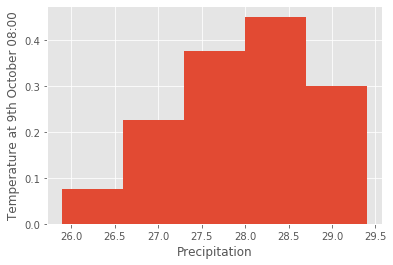

In [6]:
darwin = pd.read_csv(r'data/014015.csv', parse_dates=True, index_col='date')
darwin = darwin['air_temp']

# downsample timeseries data into hourly format
darwin = darwin.resample('H').mean()

# extract all relevant historical observations
darwin = darwin[darwin.index.day == 9]
darwin = darwin[darwin.index.hour == 8]
darwin = darwin.dropna()

print(darwin)
plt.hist(darwin, bins=5, density=True)
plt.xlabel('Precipitation')
plt.ylabel('Temperature at 9th October 08:00')

plt.show()

The snipet below creates a bar chart for the precipitation data (from the Coober Pedy Airport weather station) recorded on every 15th October from 2000 to 2018. From the bar chart, it can be seen that the Precipitation data is highly skewed.

0.0     443
19.2      9
9.6       1
0.6       1
3.0       1
2.0       1
Name: precipitation, dtype: int64


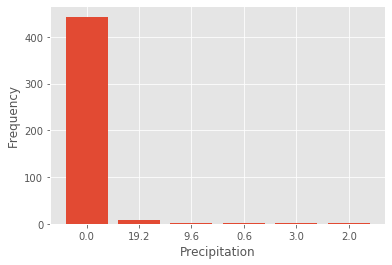

In [7]:
cooberpedy = pd.read_csv(r'data/016090.csv', parse_dates=True, index_col='date')
cooberpedy = cooberpedy['precipitation']

# downsample timeseries data into hourly format
cooberpedy = cooberpedy.resample('H').mean()

# extract all relevant historical observations
cooberpedy = cooberpedy[cooberpedy.index.day == 15]
cooberpedy = cooberpedy.dropna()

print(cooberpedy.value_counts())
plt.bar(['0.0', '19.2', '9.6', '0.6', '3.0', '2.0'], cooberpedy.value_counts().values)
plt.xlabel('Precipitation')
plt.ylabel('Frequency')

plt.show()

### Conclusion
Reviewing the above graphs/charts for weather features - Temperature, Precipitation, it is clear to identify that the density does not look like a common probability distribution, but infact looks like complex distributions. Also, not every weather feature follow the same family of distributions, for example, it can be clearly seen from the charts above that the distributions of temperature and precipitation are completely different from each other.

# Kernel Density Estimation
In our cases, weather feature data do not resemble a common probability distribution or cannot be easily made to fit the distribution. In this case, parametric density estimation is not feasible and alternative methods can be used that do not use a common distribution. Instead, an algorithm is used to approximate the probability distribution of the data without a pre-defined distribution, referred to as a nonparametric method.

A nonparametric method might estimate the density using all observations in a random sample, in effect making all observations in the sample “parameters”. The nonparametric method that we are interested in is the kernel density estimation.

A kernel is a mathematical function that returns a probability for a given value of a random variable. The kernel effectively smooths or interpolates the probabilities across the range of outcomes for a random variable such that the sum of probabilities equals one, a requirement of well-behaved probabilities.

![KDE](images/1.PNG)

# The underlying Prediction Model of The Weather Application
In this section we present the methodology researched for the prediction of the weather features in the month of October 2021.

The method we employed are nonparametric kernel density based estimates for probabilistic weather forecasting. The prediction model implements a simple kernel density estimator that produces an estimate of the probability distribution function f(X) of the weather feature X (at a particular future time period) using past hourly observations of the weather feature $X_{i}$ where assuming *i* is beginning of historical weather feature data: $1^{st}$ October 2000)

To forecast day *D* of the month October, *D* = 1,2,...,31, (at hour *h*, *h* = 1,2,...,24 which is optional), the weather application implements a KDE on all historical observations of the same day *D* and hour *h*. This methodology only considers observations belonging to the same hourly period of the same day of the month of October.

While there are several versions of kernel density estimation implemented in Python (notably in the SciPy and StatsModels packages), we opted to use Scikit-Learn's version because of its efficiency and flexibility. It is implemented in the sklearn.neighbors.KernelDensity estimator, which handles KDE in multiple dimensions with one of six kernels and one of a couple dozen distance metrics.

In [8]:
# KDE parameters - Kernel function and Bandwidth
def kde(kernel, bandwidth):
    return KernelDensity(kernel=kernel, bandwidth=bandwidth)

In [9]:
def fit(filename, column, kde, day_of_month, hour_of_day = -1, resample=True):
    data = pd.read_csv(filename, parse_dates=True, index_col='date')
    data = data[column]

    # downsample timeseries data into hourly format
    data = data.resample('H').mean()

    # extract all relevant historical observations
    data = data[data.index.day == day_of_month]
    if hour_of_day != -1:
        data = data[data.index.hour == hour_of_day]
    data = data.dropna()
    
    data_max = data.max()
    data_min = data.min()

    return kde.fit(data.to_numpy().reshape(-1, 1)), data_max, data_min, data

    

In [10]:
def sample(model, data_max, data_min, number_of_samples=350):
        x_plot = np.linspace(data_min - 1,
                             data_max + 1, number_of_samples)
        log_dens = model.score_samples(x_plot.reshape(-1, 1))
        y_plot = np.exp(log_dens)

        return (x_plot, y_plot)

The code snipet below implements the kernel density estimator (using the Epanechnikov kernel fuction and bandwidth of 0.7) based on the historical air temperature data recorded by the Darwin Airport on $9^{th}$ October from 2000 to 2018 every year.

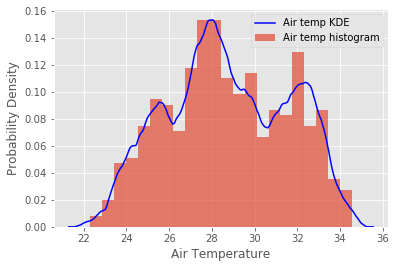

In [11]:
# main.py

_kde = kde('epanechnikov', 0.7)
(model, max, min, data) = fit(r'data/014015.csv', 'air_temp', _kde, 9)
(kde_xdata, kde_ydata) = sample(model, max, min, 200)

fig, axes = plt.subplots(1,1)

# kde line plot
axes.plot(kde_xdata, kde_ydata, color='b', alpha=0.99, label='Air temp KDE')

# histogram for air temp from historical weather feature data
nbins = int(np.sqrt(data.shape[0])) + 1
axes.hist(data, bins=nbins, density=True, alpha=0.7, label='Air temp histogram')

# labelling
plt.xlabel('Air Temperature')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

### Sprint 2 Plan
One of the main focuses in the next Sprint will be optimising the KDE to better fit the data i. e. automatically choosing the optimal KDE parametrs - Kernel function and Bandwidth.
The kernel bandwidth, which is a free parameter, can be determined using Scikit-Learn's standard cross validation tools as we are yet to research.

### References
- https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
- https://arxiv.org/pdf/1610.05183.pdf
- https://machinelearningmastery.com/probability-density-estimation/